In [1]:
import warnings
warnings.filterwarnings("ignore")
import wrangle as w

import pandas as pd
import numpy as np

#splits
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

import wrangle as w


# Acquire

In [2]:
df = pd.read_csv("merged_data - merged_data.csv")

In [3]:
df, model_df = w.prep_df(df)

In [4]:
df.head()

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0


In [5]:
def split_data(df, target_variable):
    '''
    Takes in two arguments the dataframe name and the ("target_variable" - must be in string format) to stratify  and 
    return train, validate, test subset dataframes will output train, validate, and test in that order.
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify= df[target_variable])
    train, validate = train_test_split(train, #second split
                                    test_size=.25, 
                                    random_state=123, 
                                    stratify=train[target_variable])
    return train, validate, test

In [6]:
train, validate, test = split_data(df, "outcome")

In [7]:
train.to_csv("train.csv")

* lowercase variables
* intake age/ outcome age leave just days
* name column made need to be dropped from too many nulls 
* animal id column change to id 


In [10]:
import functions as f

In [13]:
f.get_models()

NameError: name 'create_models' is not defined

In [ ]:
df.head()

# Prepare

In [ ]:
#find numeric columns
num_col = df.select_dtypes(include='number').columns
num_col

In [ ]:
#get string columns
str_col = ['outcome', 'intake_type', 'intake_condition',
       'species', 'found_location', 'intake_sex', 'breed', 'color']

In [ ]:
df.intake_sex.value_counts()

In [ ]:
df.intake_condition.value_counts()

rename intake_conditions: Normal, Injured, Immediate attn needed, mental, delayed/terminal

In [ ]:
df.head()

In [ ]:
# lowercase everything
df = df.apply(lambda x: x.astype(str).str.lower())

# top ten colors and other for erybody else, or for simplify all colors

# Question and Hypothesis Statement

In [ ]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def cross_function(train, target_variable, feature_variable, alpha=0.05):
    '''
    This function will take the train, target_variable, feature_variable, null_hypothesis, alternative_hypothesis, alpha=0.05
    and print the results and the p-value
    '''
    observed = pd.crosstab(train[target_variable], train[feature_variable])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        print(f"Reject the null hypothesis")
        print(f"Sufficient evidence to move forward with {feature_variable}")
    else:
        print("Insufficient evidence to reject the null")
    print(f" chi^2 = {chi2} p = {p}")

# Does condition affect whether an animal will be adopted?
- What's the relationship between condition and adoption?
I will use chi-square to investigate whether condition and adoption are related

I will use a confidence interval of 95%

The alpha is .05

$H_o$: 'condition' and 'adoption' are independent.

$H_a$: 'condition' and 'adoption' are related.

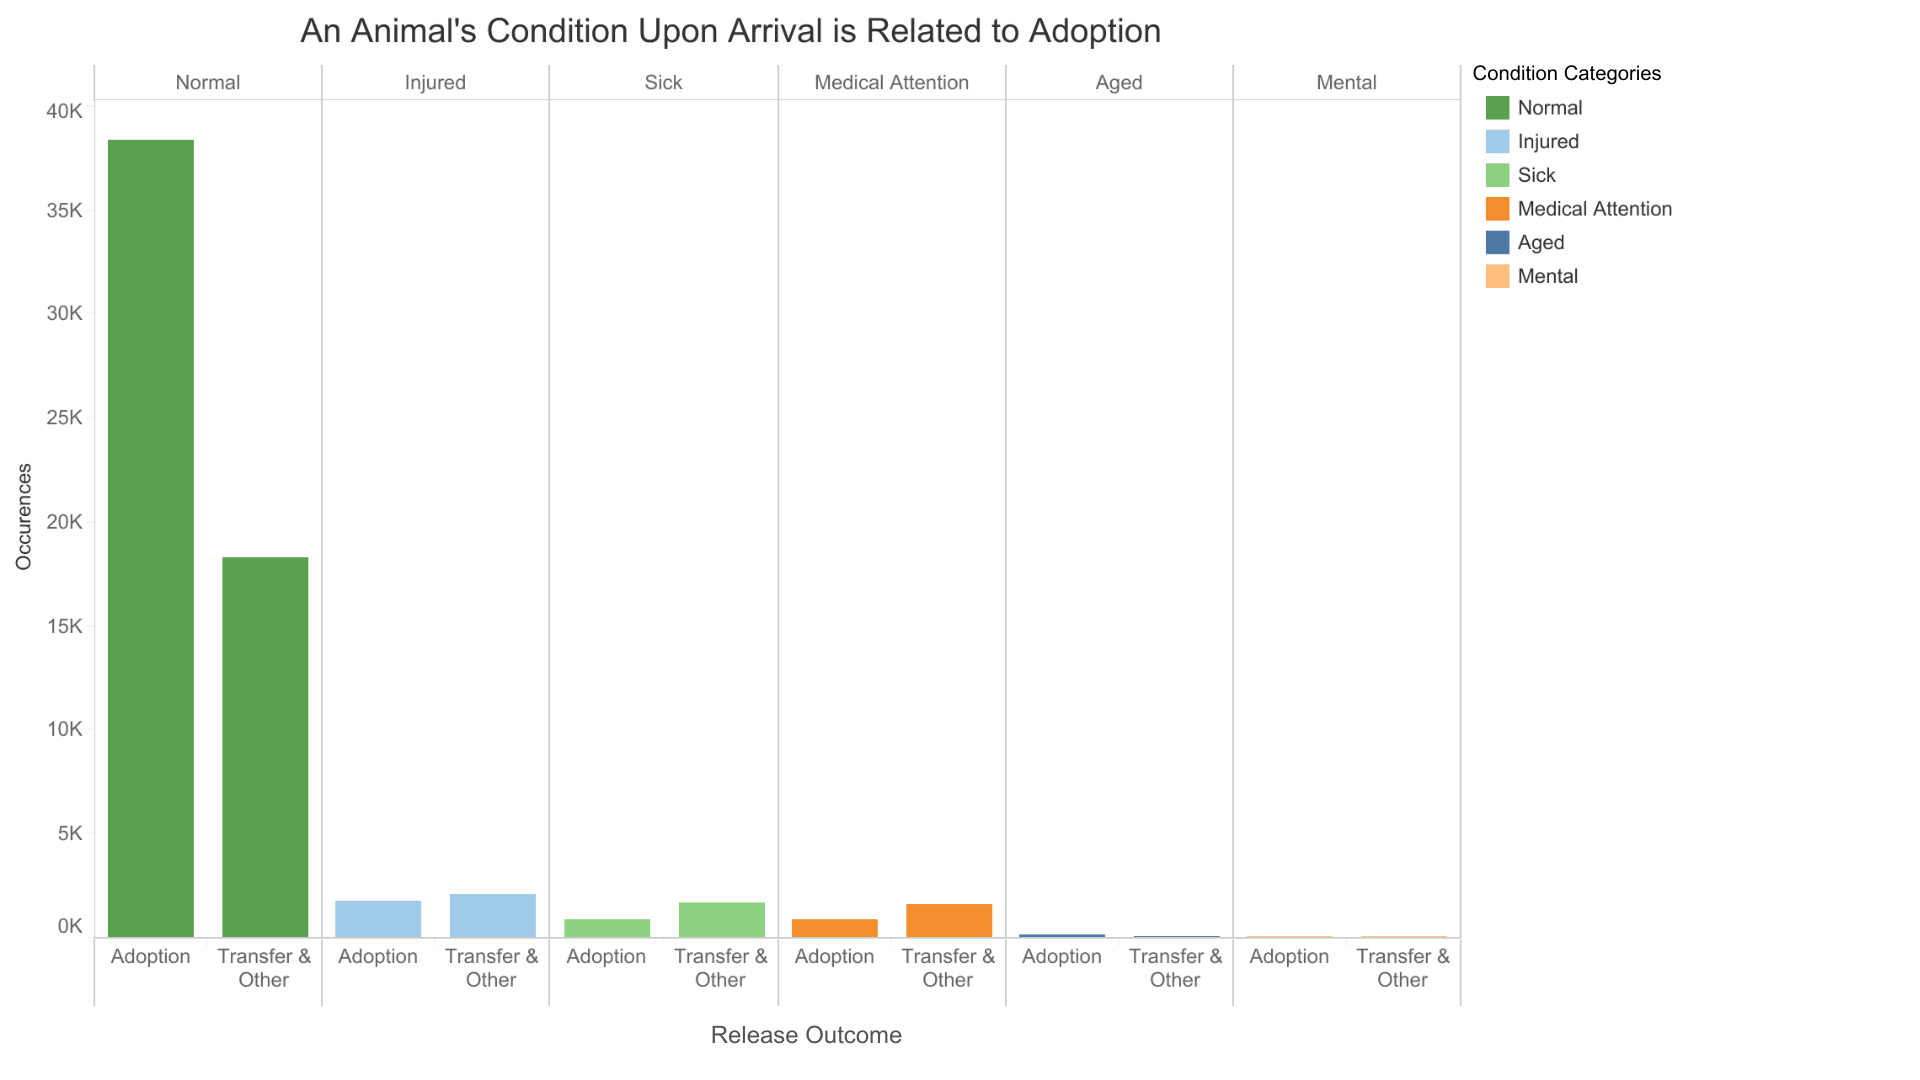

In [ ]:
target_variable = "outcome"
feature_variable = "condition"

In [ ]:
cross_function(train, target_variable, feature_variable)

In [18]:
train[train.species == "dog"].count()[1]/train.shape

array([5.56543068e-01, 2.62557143e+03])

In [ ]:
train.species.value_counts()

# Does Color affect the adoptability of an animal?

In [ ]:
I will use chi-square to investigate whether condition and adoption are related

I will use a confidence interval of 95%

The alpha is .05

: 'primary_color' and 'outcome' are independent.

: 'primary_color' and 'outcome' are related.

In [ ]:
target_variable1 = "outcome"
feature_variable1 = "primary_color"

cross_function(train, target_variable1, feature_variable1)

# Does have a mix color relation with the adoptability of an animal?
I will use chi-square to investigate whether condition and adoption are related

I will use a confidence interval of 95%

The alpha is .05

: 'mix_color' and 'outcome' are independent.

: 'mix_color' and 'outcome' are related.

In [ ]:
# viz

In [ ]:
target_variable2 = "outcome"
feature_variable2 = "mix_color"

cross_function(train, target_variable2, feature_variable2)

In [ ]:
# sif;dfko

# Is outcome related to a species?
I will use chi-square to investigate whether condition and adoption are related

I will use a confidence interval of 95%

The alpha is .05

: 'species' and 'outcome' are independent.

: 'species' and 'outcome' are related.

In [ ]:
target_variable3 = "outcome"
feature_variable3 = "species"

cross_function(train, target_variable3, feature_variable3)

# Is Sex related to a species?
I will use chi-square to investigate whether sex and adoption are related

I will use a confidence interval of 95%

The alpha is .05

: 'sex' and 'outcome' are independent.

: 'sex' and 'outcome' are related.

In [ ]:
target_variable4 = "outcome"
feature_variable4 = "rel_year"

cross_function(train, target_variable4, feature_variable4)

In [ ]:
train.outcome.value_counts()

# Conclusion

In [ ]:
train.shape

In [ ]:
42186/66047

# Question and Hypothesis Statement

# Modeling

In [ ]:
import functions as f

In [ ]:
f.

# Conclusion

# Question and Hypothesis Statement

# Conclusion